# Dark and bias analysis

The input consists of sets of 31 dark frames and 31 bias frames. One set was taken with the same settings used for the light exposures; the other set with settings identical with the flat exposures:

 - Darks and bias for the ligth exposures: ISO 6400 and 12800, exposure time 3.2s
 - Darks and bias for the flat exposures: ISO 100, exposure 1/40s

Bias in both sets were taken at 1/8000s. The darks were taken on-site right after the ligths. Bias taken next day. 

In [1]:
%pylab notebook
%matplotlib notebook

import os, glob

import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

import exifread
import rawpy

Populating the interactive namespace from numpy and matplotlib


## Utility functions 

In [2]:
# Stats
def stats(array, x, y, size, name, results):
    slice_x = slice(x,x+100)
    slice_y = slice(y,y+100)

    mean = np.mean(array[slice_x,slice_y])
    std = np.std(array[slice_x,slice_y])
    
    results[name] = [mean, std]
    print(name, "  mean =", mean, "stddev =", std)

In [3]:
# Combine darks from list, using a provided numpy averaging function.
def combine_arrays(file_list, combination_function=np.average):
    stack = None
    for fname, i in zip(file_list, range(len(file_list))):

        raw = rawpy.imread(fname)
        array = raw.raw_image_visible

        if stack is None:            
            stack = np.zeros(shape=(array.shape[0],array.shape[1],len(file_list)), dtype='float32')

        # Actual raw DN values are obtained by subtracting the
        # camera-created black level per channel. In the Sony A7, this
        # parameter is the same for all channels, and constant.
        # Just subtract it from everything.
        stack[:,:,i] = np.array(array, dtype='float32') - 512.

    return combination_function(stack, axis=2)

In [4]:
def process(path, title, results, vmin=-8, vmax=4, combination_function=np.average):
    list_p = glob.glob(path + '/*.ARW')

    # get exposure time
    f = open(list_p[0], 'rb')
    tags = exifread.process_file(f)
    exptime = str(tags['EXIF ExposureTime'])    
    
    array = combine_arrays(list_p, combination_function=combination_function)

    results[title] = {}
    
    x = int(array.shape[0] / 2)
    y = int(array.shape[1] / 2)
    stats(array, x, y, size, "Center:", results[title])

    x = 10
    y = 10
    stats(array, x, y, size, "Corner:", results[title])

    plt.figure(figsize=[10, 6])
    plt.imshow(array, vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.title(title + " " + exptime)

## Define paths to data files

In [5]:
path1 = '../astrophotography_data/MilkyWayPrettyBoy/12800/'
path2 = '../astrophotography_data/MilkyWayPrettyBoy/6400/'
path3 = '../astrophotography_data/MilkyWayPrettyBoy/darks/ISO100_3.2s/'
path4 = '../astrophotography_data/MilkyWayPrettyBoy/darks/ISO3200_25s/'

## Define dictionary to store summary of results

In [6]:
results = {}

## Analysis of dark/bias for light exposures

#### ISO 12800

In [7]:
dark_path = os.path.join(path1,'dark')
process(dark_path, 'Average dark - ISO 12800 31 frames', results)

Center:   mean = -1.2449967 stddev = 5.364467
Corner:   mean = 1.2959467 stddev = 5.920312


<IPython.core.display.Javascript object>

In [8]:
bias_path = os.path.join(path1,'bias')
process(bias_path, 'Average bias - ISO 12800 31 frames', results)

Center:   mean = 0.22802334 stddev = 4.007303
Corner:   mean = 1.4977901 stddev = 4.166765


<IPython.core.display.Javascript object>

In [9]:
process(dark_path, 'Dark standard deviation - ISO 12800 31 frames', results,
        vmin=9, vmax=14, combination_function=np.std)

Center:   mean = 12.771254 stddev = 4.579328
Corner:   mean = 13.448193 stddev = 4.73089


<IPython.core.display.Javascript object>

In [10]:
process(bias_path, 'Bias standard deviation - ISO 12800 31 frames', results,
        vmin=9, vmax=14, combination_function=np.std)

Center:   mean = 11.826737 stddev = 4.3746314
Corner:   mean = 12.316617 stddev = 4.3885856


<IPython.core.display.Javascript object>

#### ISO 6400

In [11]:
dark_path = os.path.join(path2,'dark')
process(dark_path, 'Average dark - ISO 6400 31 frames', results)

Center:   mean = 0.31908336 stddev = 2.6596832
Corner:   mean = 1.5370533 stddev = 2.95012


<IPython.core.display.Javascript object>

In [12]:
bias_path = os.path.join(path2,'bias')
process(bias_path, 'Average bias - ISO 6400 31 frames', results)

Center:   mean = -2.3239968 stddev = 2.0186186
Corner:   mean = -1.6933933 stddev = 2.1905053


<IPython.core.display.Javascript object>

In [13]:
process(dark_path, 'Dark standard deviation - ISO 6400 31 frames', results,
        vmin=5, vmax=8, combination_function=np.std)

Center:   mean = 6.627915 stddev = 2.2362556
Corner:   mean = 6.96824 stddev = 2.3556256


<IPython.core.display.Javascript object>

In [14]:
process(bias_path, 'Bias standard deviation - ISO 6400 31 frames', results,
        vmin=5, vmax=8, combination_function=np.std)

Center:   mean = 6.2756195 stddev = 2.2111707
Corner:   mean = 6.515315 stddev = 2.2487066


<IPython.core.display.Javascript object>

## Analysis of dark/bias for flat exposures (ISO 100)

In [15]:
dark_path = os.path.join(path3,'dark')
process(dark_path, 'Average dark - ISO 100 31 frames', results,
       vmin=0.6, vmax=1.4)

Center:   mean = 0.9778193 stddev = 0.41914037
Corner:   mean = 1.0113677 stddev = 0.41288483


<IPython.core.display.Javascript object>

In [16]:
bias_path = os.path.join(path3,'bias')
process(bias_path, 'Average bias - ISO 100 31 frames', results,
        vmin=0.8, vmax=1.8,)

Center:   mean = 1.2412773 stddev = 0.4515322
Corner:   mean = 1.2793161 stddev = 0.4307943


<IPython.core.display.Javascript object>

In [17]:
process(dark_path, 'Dark standard deviation - ISO 100 31 frames', results,
        vmin=2.0, vmax=2.4, combination_function=np.std)

Center:   mean = 2.1827624 stddev = 0.37087062
Corner:   mean = 2.1945558 stddev = 0.3563689


<IPython.core.display.Javascript object>

In [18]:
process(bias_path, 'Bias standard deviation - ISO 100 31 frames', results,
        vmin=2.0, vmax=2.4, combination_function=np.std)

Center:   mean = 2.2075298 stddev = 0.37512246
Corner:   mean = 2.232441 stddev = 0.346353


<IPython.core.display.Javascript object>

In [19]:
for k1 in results:
    print(k1)
    r = results[k1]
    for k2 in r:
        print(k2, r[k2])
    print()

Average dark - ISO 12800 31 frames
Center: [-1.2449967, 5.364467]
Corner: [1.2959467, 5.920312]

Average bias - ISO 12800 31 frames
Center: [0.22802334, 4.007303]
Corner: [1.4977901, 4.166765]

Dark standard deviation - ISO 12800 31 frames
Center: [12.771254, 4.579328]
Corner: [13.448193, 4.73089]

Bias standard deviation - ISO 12800 31 frames
Center: [11.826737, 4.3746314]
Corner: [12.316617, 4.3885856]

Average dark - ISO 6400 31 frames
Center: [0.31908336, 2.6596832]
Corner: [1.5370533, 2.95012]

Average bias - ISO 6400 31 frames
Center: [-2.3239968, 2.0186186]
Corner: [-1.6933933, 2.1905053]

Dark standard deviation - ISO 6400 31 frames
Center: [6.627915, 2.2362556]
Corner: [6.96824, 2.3556256]

Bias standard deviation - ISO 6400 31 frames
Center: [6.2756195, 2.2111707]
Corner: [6.515315, 2.2487066]

Average dark - ISO 100 31 frames
Center: [0.9778193, 0.41914037]
Corner: [1.0113677, 0.41288483]

Average bias - ISO 100 31 frames
Center: [1.2412773, 0.4515322]
Corner: [1.2793161, 0.

## Conclusions

##### For short exposures!

- Read noise

   Bias variance for any given pixel, along a sequence of bias exposures:
     - ISO   100 - 2.2 DN
     - ISO  6400 - 6.3 DN
     - ISO 12800 -  12 DN
 
   These are large when compared with the across-detector bias variance in the averaged frames - thus should be a good    estimator of the sensor readnoise.


- Dark fixed pattern

   In a similar way as above for the read out noise, the frame-to-frame dark variance for any given pixel is large when compared with the across-detector dark variance in the averaged darks. This suggest that no significant high-frequency fixed pattern exists in the dark signal. 



Darks have low mean values at any ISO, but the variance increases rapidily with increasing ISO. The low mwan value seemingly independent of the ISO setting suggests that the camera hardware is calibrated to adjust the ADC dark level based on the sensor gain setting. 

# Looking for pattern in long exposure dark frames

Center:   mean = 17.4494 stddev = 4.952178
Corner:   mean = 20.783787 stddev = 5.8067026


<IPython.core.display.Javascript object>


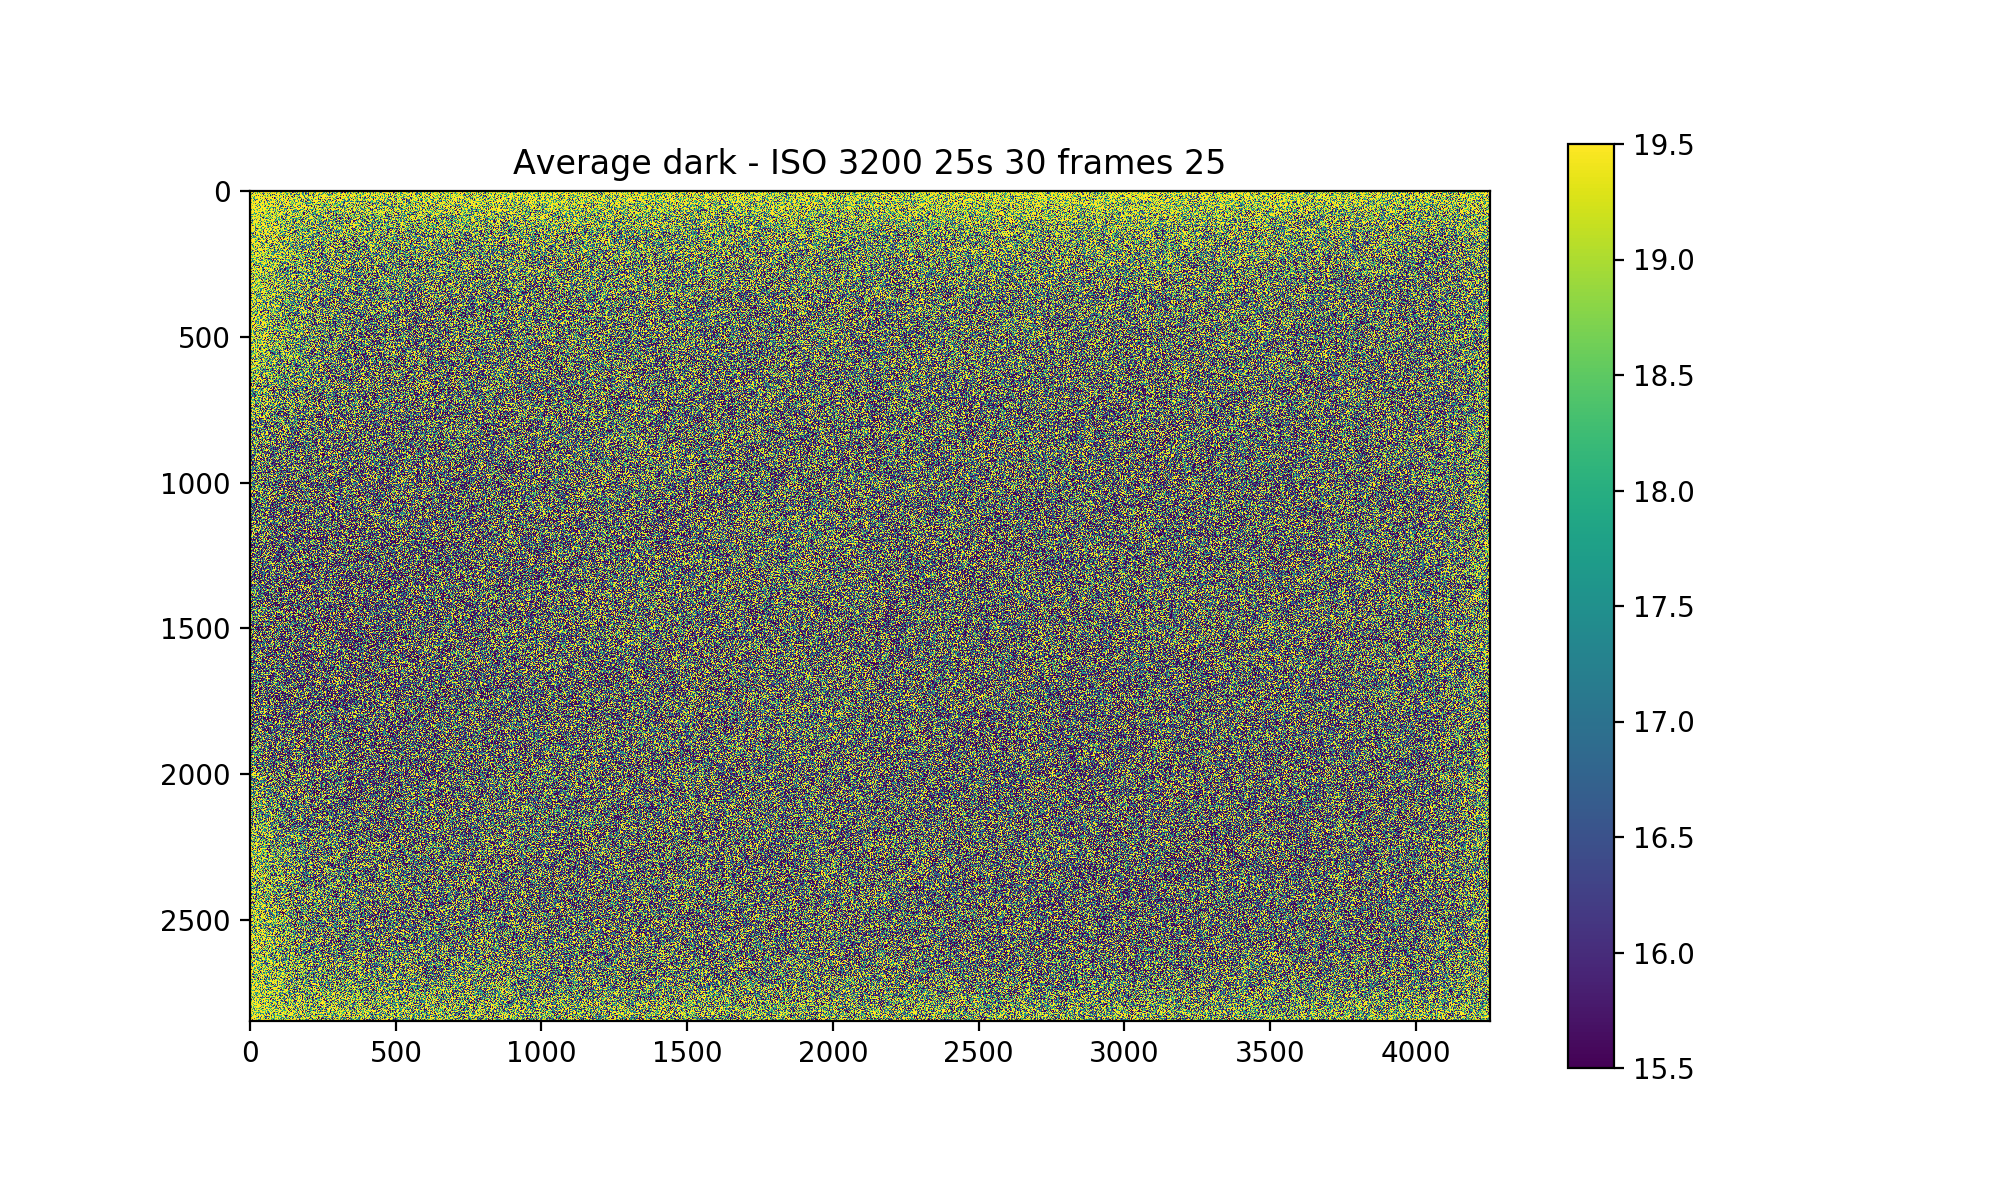

In [36]:
dark_path = os.path.join(path4,'dark')
process(dark_path, 'Average dark - ISO 3200 25s 30 frames', results, vmin=15.5, vmax=19.5)

Center:   mean = 7.6936994 stddev = 1.1550401
Corner:   mean = 8.2162285 stddev = 1.3008655


<IPython.core.display.Javascript object>


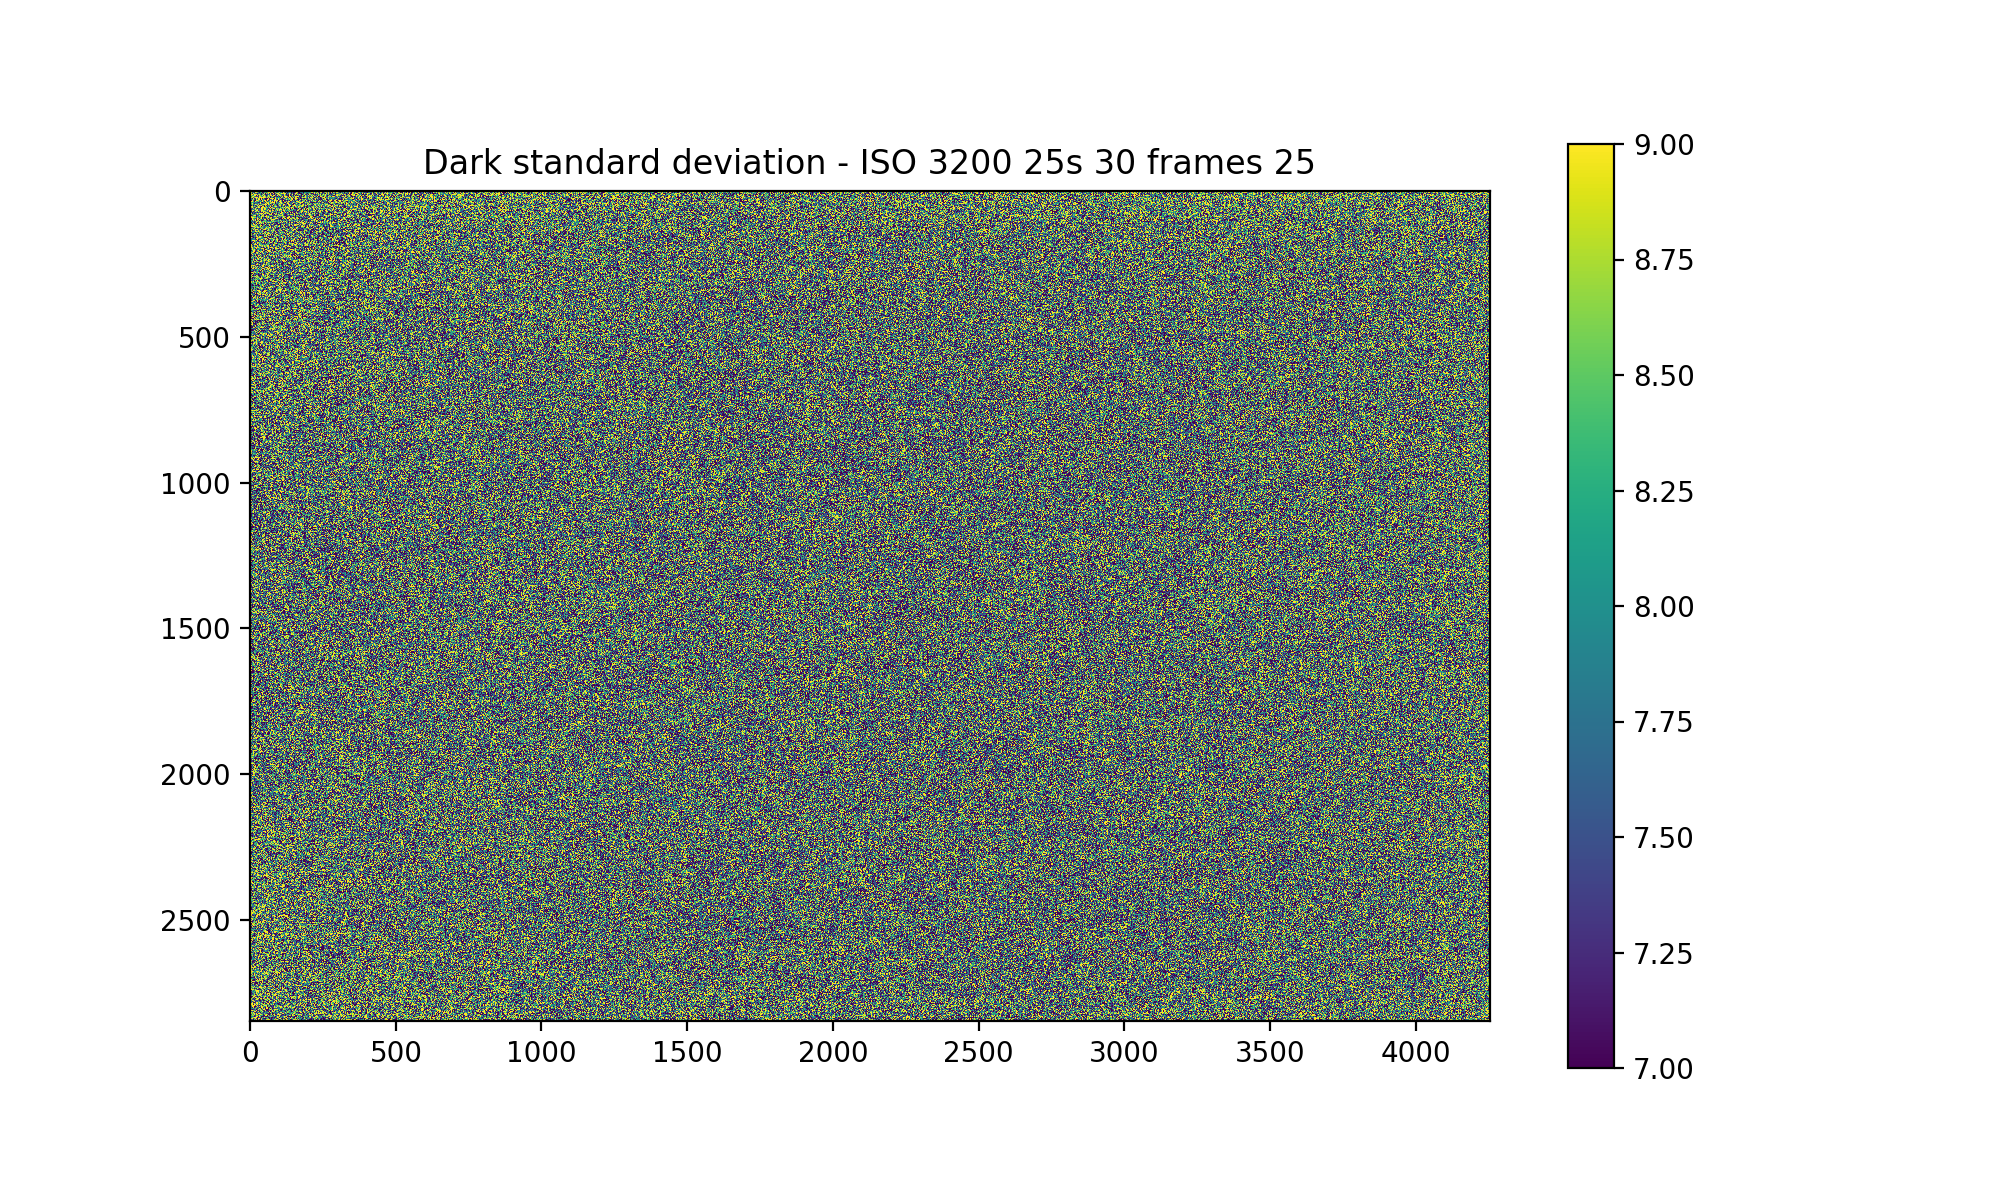

In [38]:
process(dark_path, 'Dark standard deviation - ISO 3200 25s 30 frames', results, combination_function=np.std,
       vmin=7., vmax=9.)